# Global Energy Budget

Let's read a netcdf file that include information on global energy budget. <br>
First, let's import modules that we will be using.

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

Open and read the file. 

In [2]:
filename='surface_energy2016.nc'

# read data
with xr.open_dataset(filename) as ds1:      
    print(ds1)

<xarray.Dataset>
Dimensions:    (longitude: 480, latitude: 241, time: 12)
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 2016-01-01 2016-02-01 ... 2016-12-01
Data variables:
    sshf       (time, latitude, longitude) float32 ...
    slhf       (time, latitude, longitude) float32 ...
    ssr        (time, latitude, longitude) float32 ...
    str        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2017-10-24 17:34:00 GMT by grib_to_netcdf-2.5.0: grib_to_ne...


In [3]:
ds1.sshf

<xarray.DataArray 'sshf' (time: 12, latitude: 241, longitude: 480)>
[1388160 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 2016-01-01 2016-02-01 ... 2016-12-01
Attributes:
    units:          J m**-2
    long_name:      Surface sensible heat flux
    standard_name:  surface_upward_sensible_heat_flux

Daily energy: J/m2  --> to convert W/m2, divide by 24*3600

In [4]:
daysec=24.*3600.
lw=ds1.str/daysec  # downward net LW
sw=ds1.ssr/daysec # downward net SW
lh=ds1.slhf/daysec  # downward net latent heat flux
sh=ds1.sshf/daysec  # downward net sensible heat flux

Let's calculate annual average.

In [5]:
lwa=lw.mean(dim="time")
swa=sw.mean(dim="time")
lha=lw.mean(dim="time")
sha=sh.mean(dim="time")

In [6]:
# net radiation
nr= swa+lwa
nr

<xarray.DataArray (latitude: 241, longitude: 480)>
array([[ -4.6740055,  -4.6740055,  -4.6740055, ...,  -4.6740055,
         -4.6740055,  -4.6740055],
       [ -4.4884186,  -4.478979 ,  -4.4656696, ...,  -4.514572 ,
         -4.505621 ,  -4.497593 ],
       [ -3.7054424,  -3.6947746,  -3.6832142, ...,  -3.7401047,
         -3.7285538,  -3.7167473],
       ...,
       [-21.036505 , -21.05873  , -21.07915  , ..., -20.928259 ,
        -20.964268 , -21.00073  ],
       [-19.741365 , -19.764551 , -19.787039 , ..., -19.622858 ,
        -19.662884 , -19.702013 ],
       [-18.206497 , -18.206497 , -18.206497 , ..., -18.206497 ,
        -18.206497 , -18.206497 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0

Plot the net radiation.

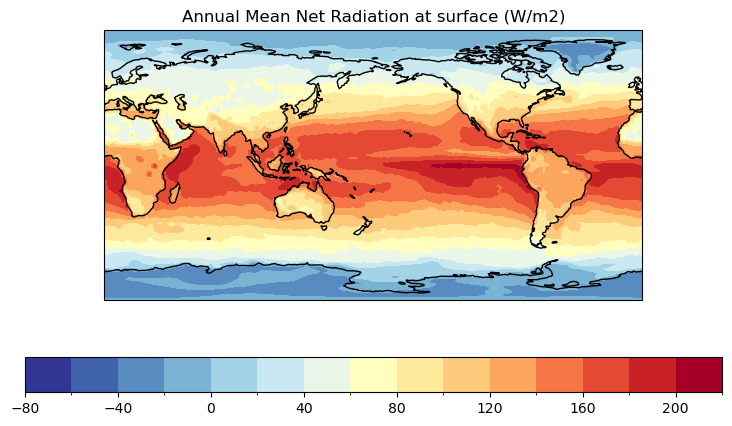

In [7]:
# Make a prettier plot
lev1=np.arange(-80,240,20)
proj = ccrs.PlateCarree()
# color map
cmap1=plt.cm.RdYlBu_r

fig1 = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cs=nr.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), levels=lev1,cmap=cmap1, add_colorbar=False, add_labels=False)
ax.coastlines()
plt.title('Annual Mean Net Radiation at surface (W/m2)')
fig1.colorbar(cs, orientation='horizontal') # color map

#### Net upward energy flux
Plot net upward energy flux.
First let's calculate net downward energy flux.

In [8]:
# net upward energy flux
nf= -(swa+lwa+lha+sha)
print (nf.shape)

(241, 480)


#### Exercise
Plot net downward energy flux.

#### Exercise
Plot average latent heat flux (-lha).

#### Exercise
Plot average sensible heat flux (-sha).